In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [8]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Сгруппируйте данные по дате, посчитайте количество продаж

In [16]:
grouped_df =df.groupby('Дата')['Количество'].sum()

Вывести несколько первых строк сгруппированных данных

In [19]:
grouped_df.head(5)

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
Name: Количество, dtype: int64

Нарисуйте график продаж у `grouped_df`

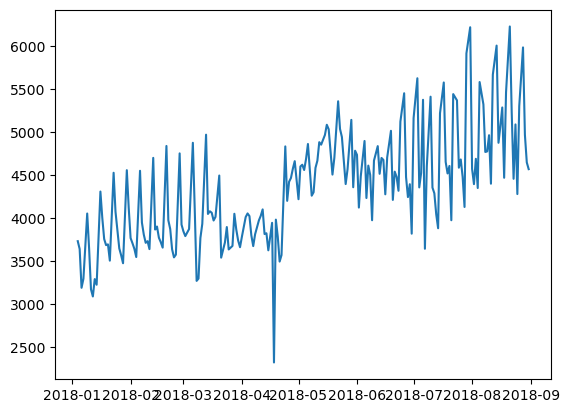

In [20]:
plt.plot(grouped_df)

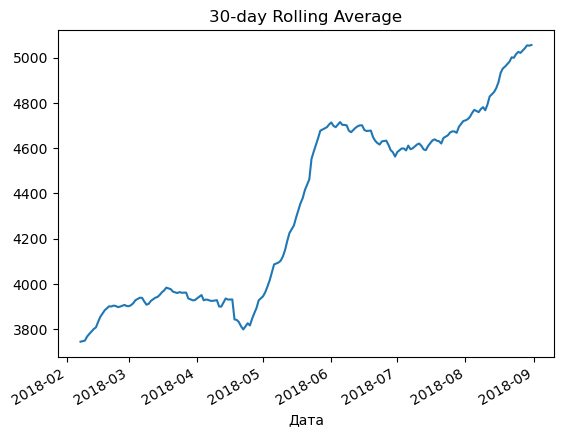

In [27]:
grouped_df.rolling(window=30).mean().plot()
plt.title("30-day Rolling Average")
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
#We can observe that the amount of sales is generally increasing. In the earliest period, around February, sales were below 3,800. 
#However, they showed a rise with some fluctuations through May. In May, there was a slight dip back to around 3,800, 
#but this was followed by a significant increase of 1,000 units in the following month.
#By July, sales experienced a minor decline, dropping slightly to around 4,600. Despite this, the overall trend remained positive, 
#as the following months continued to show steady growth.


Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [33]:
Q25=df['Количество'].quantile(0.25)
Q75=df['Количество'].quantile(0.75)

In [34]:
IQR = Q75-Q25

In [37]:
outlier=df[(df['Количество']>(Q75+1.5*IQR))|(df['Количество']<(Q25-1.5*IQR))]

In [39]:
outlier_max = outlier['Количество'].max()

In [40]:
outlier_max

200

In [44]:
raw_outliermax = df[df['Количество']==outlier_max]

In [45]:
print(raw_outliermax)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [46]:
df.head(5)

,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-01-04,1,address_0,product_0,4
1,2018-01-04,1,address_0,product_1,4
2,2018-01-04,1,address_0,product_2,5
3,2018-01-04,1,address_0,product_3,10
4,2018-01-04,1,address_0,product_4,2


In [48]:
filtered = df[(df['Дата'].dt.dayofweek==2)&(df['Дата'].dt.month.isin([6,7])&(df['Склад']==3))]

In [50]:
filtered.head()

,Дата,Склад,Контрагент,Номенклатура,Количество
191165,2018-06-06,3,address_206,product_0,2
191166,2018-06-06,3,address_206,product_1,4
191167,2018-06-06,3,address_206,product_2,4
191168,2018-06-06,3,address_206,product_3,2
191169,2018-06-06,3,address_206,product_4,1


In [55]:
max = filtered.groupby('Номенклатура')['Количество'].sum()
print(f"The product  with top sales({max.max()}) is {max.idxmax()}")

The product  with top sales(1312) is product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [95]:
temp = pd.read_excel('temp_2018.xls')

In [63]:
pip install xlrd

In [96]:
temp.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.12.2018 21:00,-17.2,744.3,779.6,0.6,86.0,"Ветер, дующий с юга",1,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,-19.0,0.6,12.0,NaN,NaN,NaN,NaN
1,31.12.2018 18:00,-14.8,743.7,778.6,0.8,84.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,NaN,NaN,NaN,-16.9,NaN,NaN,NaN,NaN,NaN,NaN
2,31.12.2018 15:00,-11.2,742.9,777.3,0.5,76.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,-14.6,NaN,NaN,NaN,NaN,NaN,NaN
3,31.12.2018 12:00,-12.7,742.4,777.1,0.5,79.0,"Ветер, дующий с юго-юго-востока",2,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",4.0,-15.6,0.3,12.0,NaN,NaN,NaN,NaN
4,31.12.2018 09:00,-14.0,741.9,776.7,1.2,81.0,"Ветер, дующий с юга",2,NaN,NaN,...,NaN,NaN,4.0,-16.6,0.3,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,18


In [97]:
temp.groupby('Местное время в Астане')['T'].mean()

Местное время в Астане
01.01.2018 00:00    -9.6
01.01.2018 03:00   -10.4
01.01.2018 06:00   -10.8
01.01.2018 09:00   -11.1
01.01.2018 12:00    -8.5
                    ... 
31.12.2018 09:00   -14.0
31.12.2018 12:00   -12.7
31.12.2018 15:00   -11.2
31.12.2018 18:00   -14.8
31.12.2018 21:00   -17.2
Name: T, Length: 2918, dtype: float64

In [98]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Местное время в Астане  2918 non-null   object 
 1   T                       2918 non-null   float64
 2   Po                      2918 non-null   float64
 3   P                       2918 non-null   float64
 4   Pa                      2913 non-null   float64
 5   U                       2916 non-null   float64
 6   DD                      2918 non-null   object 
 7   Ff                      2918 non-null   int64  
 8   ff10                    19 non-null     float64
 9   ff3                     67 non-null     float64
 10  N                       2916 non-null   object 
 11  WW                      2918 non-null   object 
 12  W1                      1098 non-null   object 
 13  W2                      1098 non-null   object 
 14  Tn                      363 non-null    

In [99]:
temp['Местное время в Астане'] = pd.to_datetime(temp['Местное время в Астане'])

C:\Users\samal\AppData\Local\Temp\ipykernel_888\2430484254.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  temp['Местное время в Астане'] = pd.to_datetime(temp['Местное время в Астане'])


In [134]:
temp['Дата'] = pd.to_datetime(temp['Местное время в Астане']).dt.date


In [135]:
temp.groupby('Дата')['T'].mean()

Дата
2018-01-01    -9.3250
2018-01-02    -9.7125
2018-01-03   -11.0000
2018-01-04   -13.0875
2018-01-05   -17.2500
               ...   
2018-12-27   -20.5500
2018-12-28   -13.7125
2018-12-29    -7.7250
2018-12-30    -9.6125
2018-12-31   -13.6250
Name: T, Length: 365, dtype: float64

In [136]:
temp['Дата'] = pd.to_datetime(temp['Дата'], dayfirst=True, errors='coerce')
daily_mean_temp = temp.groupby('Дата')['T'].mean().reset_index()

In [137]:
df_new = pd.merge(grouped_df, daily_mean_temp, on='Дата', how='inner')

In [138]:
df_new.head()

,Дата,Количество,T
0,2018-01-04,3734,-13.0875
1,2018-01-05,3643,-17.2500
2,2018-01-06,3193,-14.1250
3,2018-01-07,3298,-12.3375
4,2018-01-09,4055,-7.3875


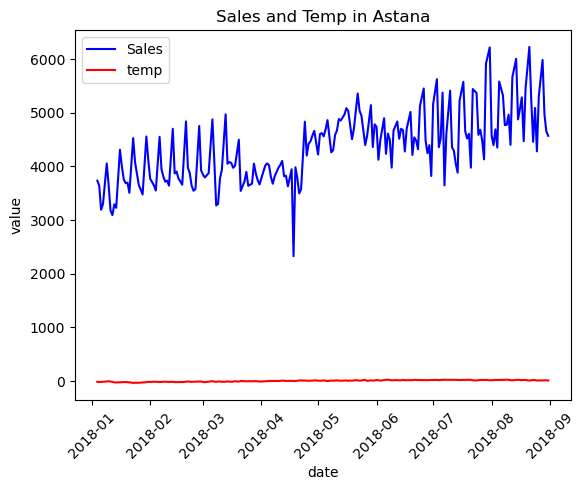

In [142]:
plt.plot(df_new['Дата'], df_new['Количество'], label='Sales', color='blue')
plt.plot(df_new['Дата'], df_new['T'], label='temp', color='red')
plt.title("Sales and Temp in Astana")
plt.xlabel("date")
plt.ylabel("value")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# better do scaling to see any result

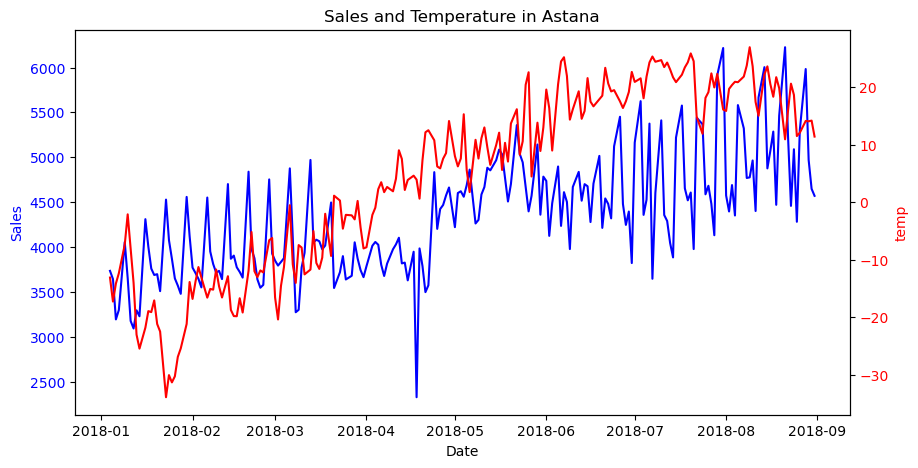

In [145]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(df_new['Дата'], df_new['Количество'], label='Sales', color='blue')
ax1.set_xlabel("Date")
ax1.set_ylabel("Sales", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df_new['Дата'], df_new['T'], label='Temp', color='red')
ax2.set_ylabel("temp", color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title("Sales and Temperature in Astana")
plt.show()


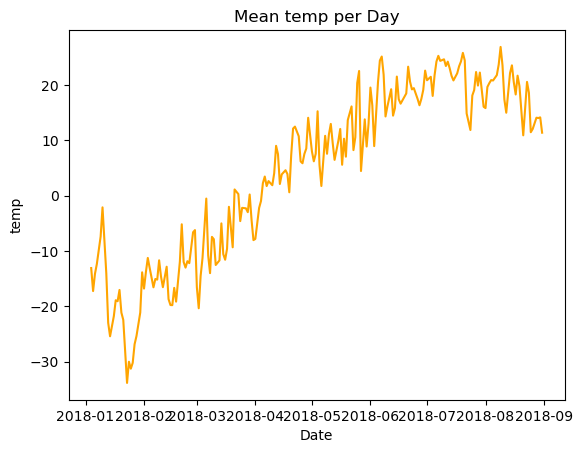

In [146]:
plt.plot(df_new['Дата'], df_new['T'], label='Temp', color='orange')
plt.title("Mean temp per Day")
plt.xlabel("Date")
plt.ylabel("temp")
plt.show()